In [1]:
# Demo of Conv2D layers
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [2]:
# Basics
# Image is sent to a Conv2D in the format of - Batch Size - Height, width , number of color channels

In [3]:
import numpy as np
x = np.random.randint(0,100,(5,5))
x = np.array(x,dtype="float32")
print(x)

[[32.  0. 35. 72. 33.]
 [86. 75. 90. 75. 40.]
 [74. 20. 42.  1. 70.]
 [99.  3. 79. 87. 31.]
 [67. 39. 73. 16. 70.]]


In [7]:
# reshape the x
x = np.reshape(x,(1,5,5,1))
print(x.shape)

(1, 5, 5, 1)


In [8]:
conv = Conv2D(filters=1, kernel_size=(3,3), strides=(1,1),
              padding="same", input_shape=(5,5,1)) # use the padding

In [12]:
conv = Conv2D(filters=1, kernel_size=(3,3), strides=(1,1),
              padding="valid", input_shape=(5,5,1)) # no padding

In [13]:
conv(x)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 75.1994  ],
         [ 47.953373],
         [ 20.399586]],

        [[ 16.072336],
         [-15.537022],
         [ 27.85926 ]],

        [[ 46.483227],
         [ 36.98137 ],
         [ 75.17574 ]]]], dtype=float32)>

In [14]:
conv.get_weights()

[array([[[[-0.21173632]],
 
         [[-0.4835992 ]],
 
         [[-0.06153399]]],
 
 
        [[[ 0.36669493]],
 
         [[ 0.2559998 ]],
 
         [[-0.14718872]]],
 
 
        [[[ 0.5517949 ]],
 
         [[ 0.44872284]],
 
         [[-0.07541388]]]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
conv.get_weights()[0].reshape(3,3)

array([[-0.21173632, -0.4835992 , -0.06153399],
       [ 0.36669493,  0.2559998 , -0.14718872],
       [ 0.5517949 ,  0.44872284, -0.07541388]], dtype=float32)

In [17]:
import tensorflow as tf
tf.reshape(x,(5,5))

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[32.,  0., 35., 72., 33.],
       [86., 75., 90., 75., 40.],
       [74., 20., 42.,  1., 70.],
       [99.,  3., 79., 87., 31.],
       [67., 39., 73., 16., 70.]], dtype=float32)>

In [19]:
#Test Theoritical Knowledge
x_flat = tf.reshape(x[:,:3,:3,:],-1) # input
w_flat = tf.reshape(conv.get_weights()[0],-1) # weights
tf.tensordot(x_flat,w_flat,axes=1)

<tf.Tensor: shape=(), dtype=float32, numpy=75.19941>

In [20]:
pool = MaxPooling2D(pool_size=(2,2))

In [21]:
x

array([[[[32.],
         [ 0.],
         [35.],
         [72.],
         [33.]],

        [[86.],
         [75.],
         [90.],
         [75.],
         [40.]],

        [[74.],
         [20.],
         [42.],
         [ 1.],
         [70.]],

        [[99.],
         [ 3.],
         [79.],
         [87.],
         [31.]],

        [[67.],
         [39.],
         [73.],
         [16.],
         [70.]]]], dtype=float32)

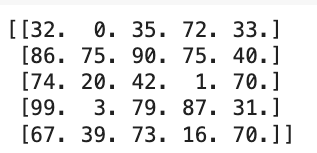

In [22]:
pool(x)

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[86.],
         [90.]],

        [[99.],
         [87.]]]], dtype=float32)>